# ASVspoof Challenge and Datasets


[ASVspoof](https://www.asvspoof.org/) initiative is the modern standard in Anti-Spoofing research. ASVspoof Challenges (2015, 2017, 2019, 2021, 2023\24) provide data and define rules/metrics for comparison of different Countermeasure Systems (CMs). Since 2022, development of Spoofing-Aware Speaker Verifiction (SASV) systems has been included.

ASVspoof 5 Challenge (2023\24) is not ready yet, therefore we will use conventional ASVspoof Challenge 2019\2021 Datasets. They include data for 3 tasks:

1. Logical Access (LA): detection of synthesized speech

2. Physical Access (PA): detection of replay attacks (recorded speech)

3. DeepFake (DF, Only in 2021): similar to LA but with emphasis on deceiving real people (not ASV system)

ASVspoof 2019 Dataset in also available in [Kaggle](https://www.kaggle.com/datasets/awsaf49/asvpoof-2019-dataset).

The structure of the Dataset is the following:

```
ASVspoof2019
    --> LA
        --> ASVspoof2019_LA_asv_protocols # Protocols for SASV evaluation and t-DCF metric
        --> ASVspoof2019_LA_asv_scores # ASV scores for utterances. Required for SASV evaluation and t-DCF metric
        --> ASVspoof2019_LA_cm_protocols # Protocols for training and evaluation of CM systems
        --> ASVspoof2019_LA_dev # Development Set
        --> ASVspoof2019_LA_eval # Evaluation Set
        --> ASVspoof2019_LA_train # Training Set
            --> flac
                --> LA_T_*******.flac # Utterance
    --> PA
```

Protocol defines whether utterance is bona-fide or spoofed. For CMs, it looks like this:

```
|   SpeakerID | UtteranceID   | UtteranceType? | SpoofAlgoId | IsSpoofed |
|   LA_0079   | LA_T_3999087  |       -        |      -      | bonafide  |
|   LA_0079   | LA_T_3851087  |       -        |     A01     |   spoof   |
```

For ASV evaluation, it looks like this:
```
|   SpeakerID | UtteranceID   | SpoofAlgoId | AttackType |
|   LA_0072   | LA_D_4356541  |   bonafide  |   target   |
|   LA_0078   | LA_D_5490922  |   bonafide  |  nontarget |
|   LA_0072   | LA_D_8889390  |     A01     |   spoof    |
```

For getting owner's genuine embeddings, ASV requires some bona-fide examples of speech for each speaker. The corresponding protocol looks like this:

```
|   SpeakerID |             UtteranceID           |
|   LA_0072   | LA_D_A1046944,LA_D_A1519783, ...  |
```

---

For PA task protocols are similar. Here is for CM:

```
|   SpeakerID | UtteranceID   | UtteranceType?   | SpoofAlgoId | IsSpoofed |
|   PA_0079   | PA_T_0000001  |       aaa        |      -      | bonafide  |
|   PA_0079   | PA_T_0007745  |       aab        |      AC     |   spoof   |
```

For ASV, likewise, there are changes in Utterance Types and Algorithms IDs.

For getting owner's genuine embeddings, similarly, we get bona-fide speech for different Utterance Types.

---

The list of spoofing alogrithms presented in the Dataset and their definitions are presented in the paper ["ASVspoof 2019: A large-scale public database of synthesized, converted and replayed
speech"](https://arxiv.org/pdf/1911.01601.pdf)

---

Let's download Dataset and look at the example.

### Dowloading Dataset

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d awsaf49/asvpoof-2019-dataset

100% 23.6G/23.6G [04:34<00:00, 48.6MB/s]
100% 23.6G/23.6G [04:34<00:00, 92.4MB/s]


In [ ]:
!rm -r ~/.kaggle
!rm ./kaggle.json

rm: cannot remove './kaggle.json': No such file or directory


In [ ]:
!unzip -q ./asvpoof-2019-dataset.zip

In [ ]:
!ls

asvpoof-2019-dataset.zip		     LA		       README.txt
asvspoof2019_evaluation_plan.pdf	     LICENSE_text.txt  sample_data
asvspoof2019_Interspeech2019_submission.pdf  PA


### Examples


#### LA

Firstly, let's look at the LA task.

In [ ]:
import torchaudio
from IPython.display import Audio

# for speaker LA_0079

bonafide_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3999087.flac'
spoof1_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3851087.flac' # A01 (TTS)
spoof2_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_7962577.flac' # A05 (VC)


bonafide_audio, sr = torchaudio.load(bonafide_path)
spoof1_audio, sr = torchaudio.load(spoof1_path)
spoof2_audio, sr = torchaudio.load(spoof2_path)

In [ ]:
Audio(bonafide_audio, rate=sr)

In [ ]:
Audio(spoof1_audio, rate=sr)

In [ ]:
Audio(spoof2_audio, rate=sr)

These spoofing examples are easy for human ear, but let's check utterances with harder algorithms.

In [ ]:
spoof3_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_4920751.flac' # A17 (VC)

spoof3_audio, sr = torchaudio.load(spoof3_path)
Audio(spoof3_audio, rate=sr)

More real! Let's guess are the following utterances real or not:

In [ ]:
question_1_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_7991213.flac'

question_1_audio, sr = torchaudio.load(question_1_path)
Audio(question_1_audio, rate=sr)

In [ ]:
# @title

# It is bona-fide

In [ ]:
question_2_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_5118048.flac'

question_2_audio, sr = torchaudio.load(question_2_path)
Audio(question_2_audio, rate=sr)

In [ ]:
# @title

# It is A19 (VC)

In [ ]:
question_3_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_7999782.flac'

question_3_audio, sr = torchaudio.load(question_3_path)
Audio(question_3_audio, rate=sr)

In [ ]:
# @title

# It is A14 (TTS + VC)

In [ ]:
question_4_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_9648263.flac'

question_4_audio, sr = torchaudio.load(question_4_path)
Audio(question_4_audio, rate=sr)

In [ ]:
# @title

# It is A14 (TTS + VC)

#### PA

Now let's look at the PA task:

In [ ]:
import torchaudio
from IPython.display import Audio

# for speaker PA_0079

PA_bonafide1_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0000001.flac' # aaa
PA_bonafide2_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0000203.flac' # aab
PA_bonafide3_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0001409.flac' # acb

PA_spoof1_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0006696.flac' # aaa BB
PA_spoof2_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0007745.flac' # aab AC
PA_spoof3_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0018256.flac' # acb AB


PA_bonafide1_audio, PA_sr = torchaudio.load(PA_bonafide1_path)
PA_bonafide2_audio, PA_sr = torchaudio.load(PA_bonafide2_path)
PA_bonafide3_audio, PA_sr = torchaudio.load(PA_bonafide3_path)

PA_spoof1_audio, PA_sr = torchaudio.load(PA_spoof1_path)
PA_spoof2_audio, PA_sr = torchaudio.load(PA_spoof2_path)
PA_spoof3_audio, PA_sr = torchaudio.load(PA_spoof3_path)

In [ ]:
Audio(PA_bonafide1_audio, rate=PA_sr)

In [ ]:
Audio(PA_spoof1_audio, rate=PA_sr)

In [ ]:
Audio(PA_bonafide2_audio, rate=PA_sr)

In [ ]:
Audio(PA_spoof2_audio, rate=PA_sr)

In [ ]:
Audio(PA_bonafide3_audio, rate=PA_sr)

In [ ]:
Audio(PA_spoof3_audio, rate=PA_sr)

# Sinc-Layer

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import sys
from torch.autograd import Variable
import math

%matplotlib inline
import scipy.signal as dsp
from scipy import fft
import torchaudio
#torchaudio.set_audio_backend("sox_io")
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

Note that eq. (4) in the [SincNet Paper](https://arxiv.org/pdf/1808.00158.pdf) is symmetric:

$$
n \in [-L, L]
$$
$$
g[n, f_1, f_2] = 2f_2 \cdot \mathop{sinc}(2\pi f_2n) - 2f_1 \cdot \mathop{sinc}(2\pi f_1n)
$$
$$
\mathop{sinc}(-x) = \frac{\sin(-x)}{-x} = \frac{-\sin(x)}{-x} = \frac{\sin(x)}{x} = \mathop{sinc}(x)
$$

Hence $g[k] = g[-k]$. Moreover $g[0] = 2 f_2  - 2 f_1 = 2(f_2 - f_1)$

---

Let $S = \frac{2\pi n}{\text{sample_rate}}$. Note that we can rewrite eq. (4) in a simpler (for computing) form:

$$
2f_2 \cdot \mathop{sinc}(2\pi f_2n) - 2f_1 \cdot \mathop{sinc}(2\pi f_1n) = 2 f_2 \frac{sin(2\pi f_2 n)}{2 \pi f_2 n} - 2 f_1 \frac{sin(2\pi f_1 n)}{2 \pi f_1 n} =
$$

$$
= \frac{sin(2\pi f_2 n)}{\pi n} - \frac{sin(2\pi f_1 n)}{\pi n} =
\frac{sin(2\pi f_2 n)}{\frac{2\pi n}{\text{sample_rate}} \cdot {\frac{\text{sample_rate}}{2}}} - \frac{sin(2\pi f_1 n)}{\frac{2\pi n}{\text{sample_rate}} \cdot {\frac{\text{sample_rate}}{2}}} =
$$

$$
= \frac{1}{\text{sample_rate}} \cdot \frac{sin(2\pi f_2 n) - sin(2\pi f_1 n)}{S / 2}
$$


In [ ]:
class SincConv_fast(nn.Module):
    """Sinc-based convolution
    Parameters
    ----------
    in_channels : `int`
        Number of input channels. Must be 1.
    out_channels : `int`
        Number of filters.
    kernel_size : `int`
        Filter length.
    sample_rate : `int`, optional
        Sample rate. Defaults to 16000.
    Usage
    -----
    See `torch.nn.Conv1d`
    Reference
    ---------
    Mirco Ravanelli, Yoshua Bengio,
    "Speaker Recognition from raw waveform with SincNet".
    https://arxiv.org/abs/1808.00158
    """

    @staticmethod
    def to_mel(hz):
        return 2595 * np.log10(1 + hz / 700)

    @staticmethod
    def to_hz(mel):
        return 700 * (10 ** (mel / 2595) - 1)

    def __init__(self, out_channels, kernel_size, sample_rate=16000, in_channels=1,
                 stride=1, padding=0, dilation=1, bias=False, groups=1, min_low_hz=50, min_band_hz=50):

        super(SincConv_fast,self).__init__()

        if in_channels != 1:
            #msg = (f'SincConv only support one input channel '
            #       f'(here, in_channels = {in_channels:d}).')
            msg = "SincConv only support one input channel (here, in_channels = {%i})" % (in_channels)
            raise ValueError(msg)

        self.out_channels = out_channels
        self.kernel_size = kernel_size

        # Forcing the filters to be odd (i.e, perfectly symmetrics)
        if kernel_size%2==0:
            self.kernel_size=self.kernel_size+1

        self.stride = stride
        self.padding = padding
        self.dilation = dilation

        if bias:
            raise ValueError('SincConv does not support bias.')
        if groups > 1:
            raise ValueError('SincConv does not support groups.')

        self.sample_rate = sample_rate
        self.min_low_hz = min_low_hz
        self.min_band_hz = min_band_hz

        # initialize filterbanks such that they are equally spaced in Mel scale
        low_hz = 0
        high_hz = self.sample_rate / 2 - (self.min_low_hz + self.min_band_hz)

        # In the future we will set high hz as band_hz + low + min_band_hz + min_low_hz
        # Where band_hz is (high_hz - low_hz). Therefore, it is reasonable to
        # do diff and do not set high_hz as sr/2

        mel = np.linspace(self.to_mel(low_hz),
                          self.to_mel(high_hz),
                          self.out_channels + 1)
        hz = self.to_hz(mel)


        # filter lower frequency (out_channels, 1)
        self.low_hz_ = nn.Parameter(torch.Tensor(hz[:-1]).view(-1, 1)) # learnable f1 from the paper

        # filter frequency band (out_channels, 1)
        self.band_hz_ = nn.Parameter(torch.Tensor(np.diff(hz)).view(-1, 1)) # learnable f2 (f2 = f1+diff) from the paper

        # len(g) = kernel_size
        # It is symmetric, therefore we will do computations only with left part, while creating g.

        # Hamming window
        #self.window_ = torch.hamming_window(self.kernel_size)
        n_lin=torch.linspace(0, (self.kernel_size/2)-1, steps=int((self.kernel_size/2))) # computing only half of the window
        self.window_=0.54-0.46*torch.cos(2*math.pi*n_lin/self.kernel_size);

        # self.window is eq. (8)


        # (1, kernel_size/2)
        n = (self.kernel_size - 1) / 2.0
        self.n_ = 2*math.pi*torch.arange(-n, 0).view(1, -1) / self.sample_rate # Due to symmetry, I only need half of the time axes

        # self.n_ = 2 * pi * n / sr


    def forward(self, waveforms):
        """
        Parameters
        ----------
        waveforms : `torch.Tensor` (batch_size, 1, n_samples)
            Batch of waveforms.
        Returns
        -------
        features : `torch.Tensor` (batch_size, out_channels, n_samples_out)
            Batch of sinc filters activations.
        """

        self.n_ = self.n_.to(waveforms.device)

        print('self.n_', self.n_)
        print('--------------------')

        self.window_ = self.window_.to(waveforms.device)

        low = self.min_low_hz  + torch.abs(self.low_hz_) # eq. (5) + make sure low >= min_low_hz

        high = torch.clamp(low + self.min_band_hz + torch.abs(self.band_hz_),self.min_low_hz,self.sample_rate/2) # eq. (6) + make sure band has length >= min_band_hz
        band=(high-low)[:,0] # g[0] / 2

        print('band', band)
        print('low', low)
        print('high', high)
        print('--------------------')

        f_times_t_low = torch.matmul(low, self.n_) # 2 * pi * n * freq / sr
        f_times_t_high = torch.matmul(high, self.n_)

        print('times_t_low', f_times_t_low)
        print('times_t_high', f_times_t_high)
        print('--------------------')

        # 2*f2*sinc(2*pi*f2*n) - 2*f1*sinc(2*pi*f1*n)
        # 2*f2*sin(2*pi*f2*n) / (2 * pi * f2 * n) - 2*f1*sin(2*pi*f1*n) / (2 * pi * f1 * n)
        # sin(2*pi*f2*n) / (pi n) - sin(2*pi*f1*n) / (pi n)

        # (2 / sr) * sin(f_times_t_high) / self.n_ -  (2 / sr) * sin(f_times_t_low) / self.n_
        # (1/ sr) * (sin(f_times_t_high) - sin(f_times_t_low)) / (self.n_ / 2)

        # sr * correct eq. (4)

        # because self.n_ = 2 * pi * n / sr

        band_pass_left=((torch.sin(f_times_t_high)-torch.sin(f_times_t_low))/(self.n_/2))*self.window_ # Equivalent of Eq.4 of the reference paper (SPEAKER RECOGNITION FROM RAW WAVEFORM WITH SINCNET). I just have expanded the sinc and simplified the terms. This way I avoid several useless computations.
        band_pass_center = 2*band.view(-1,1) # g[0] = 2 * (f2 - f1) = 2 * band, w[0] = 1
        band_pass_right= torch.flip(band_pass_left,dims=[1]) # g[n] = g[-n]

        print('band_pass_left', band_pass_left)
        print('band_pass_center', band_pass_center)
        print('---------------')


        band_pass=torch.cat([band_pass_left,band_pass_center,band_pass_right],dim=1) # create full g[n]


        band_pass = band_pass / (2*band[:,None]) # normalize so the max is 1

        # band_pass_left = sr * correct (4)
        # center = freq (not scaled via division) = sr * scaled_freq
        # thus, after normalization we will divide all by sr and get normalized correct(4) + normalized center


        self.filters = (band_pass).view(
            self.out_channels, 1, self.kernel_size)

        return F.conv1d(waveforms, self.filters, stride=self.stride,
                        padding=self.padding, dilation=self.dilation,
                         bias=None, groups=1) # x[n] * g[n]


In [ ]:
import torchaudio
from IPython.display import Audio

# for speaker LA_0079

audio_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3999087.flac'

audio, sr = torchaudio.load(audio_path)

In [ ]:
Audio(audio, rate=sr)

In [ ]:
audio.shape

torch.Size([1, 45641])

In [ ]:
model = SincConv_fast(out_channels=1, kernel_size=51, min_band_hz=0, min_low_hz=5000)

In [ ]:
sinc_audio = model(audio).detach()
print('sinc_audio', sinc_audio)
print('shape', sinc_audio.shape)

self.n_ tensor([[-0.0098, -0.0094, -0.0090, -0.0086, -0.0082, -0.0079, -0.0075, -0.0071,
         -0.0067, -0.0063, -0.0059, -0.0055, -0.0051, -0.0047, -0.0043, -0.0039,
         -0.0035, -0.0031, -0.0027, -0.0024, -0.0020, -0.0016, -0.0012, -0.0008,
         -0.0004]])
--------------------
band tensor([2970.], grad_fn=<SelectBackward0>)
low tensor([[5030.]], grad_fn=<AddBackward0>)
high tensor([[8000.]], grad_fn=<ClampBackward1>)
--------------------
times_t_low tensor([[-49.3819, -47.4066, -45.4314, -43.4561, -41.4808, -39.5055, -37.5303,
         -35.5550, -33.5797, -31.6044, -29.6291, -27.6539, -25.6786, -23.7033,
         -21.7280, -19.7528, -17.7775, -15.8022, -13.8269, -11.8517,  -9.8764,
          -7.9011,  -5.9258,  -3.9506,  -1.9753]], grad_fn=<MmBackward0>)
times_t_high tensor([[-78.5398, -75.3982, -72.2566, -69.1150, -65.9734, -62.8319, -59.6903,
         -56.5487, -53.4071, -50.2655, -47.1239, -43.9823, -40.8407, -37.6991,
         -34.5575, -31.4159, -28.2743, -25.1327, -

In [ ]:
def plot_audio(audio, axes, step=5):
    axes.plot(audio[0])
    axes.set_xticks(np.arange(audio.shape[1] + 1, step=audio.shape[1] / step),
                np.arange(audio.shape[1] + 1, step=audio.shape[1] / step) / sr)
    axes.set_xlabel('Time[sec]', fontsize=15)
    axes.set_ylabel('Amplitude', fontsize=15)

In [ ]:
def plot_freq(audio, axes, step=5):
    original_fft_data = np.absolute(fft.fft(audio[0], n=256))
    axes.plot(original_fft_data)
    xticks = axes.get_xticks()
    new_xticks = np.arange(xticks[-2], step=step)
    axes.set_xticks(new_xticks, (new_xticks * sr / 256))
    axes.set_xlabel('Frequency[Hz]')
    axes.set_ylabel('Magnitude')

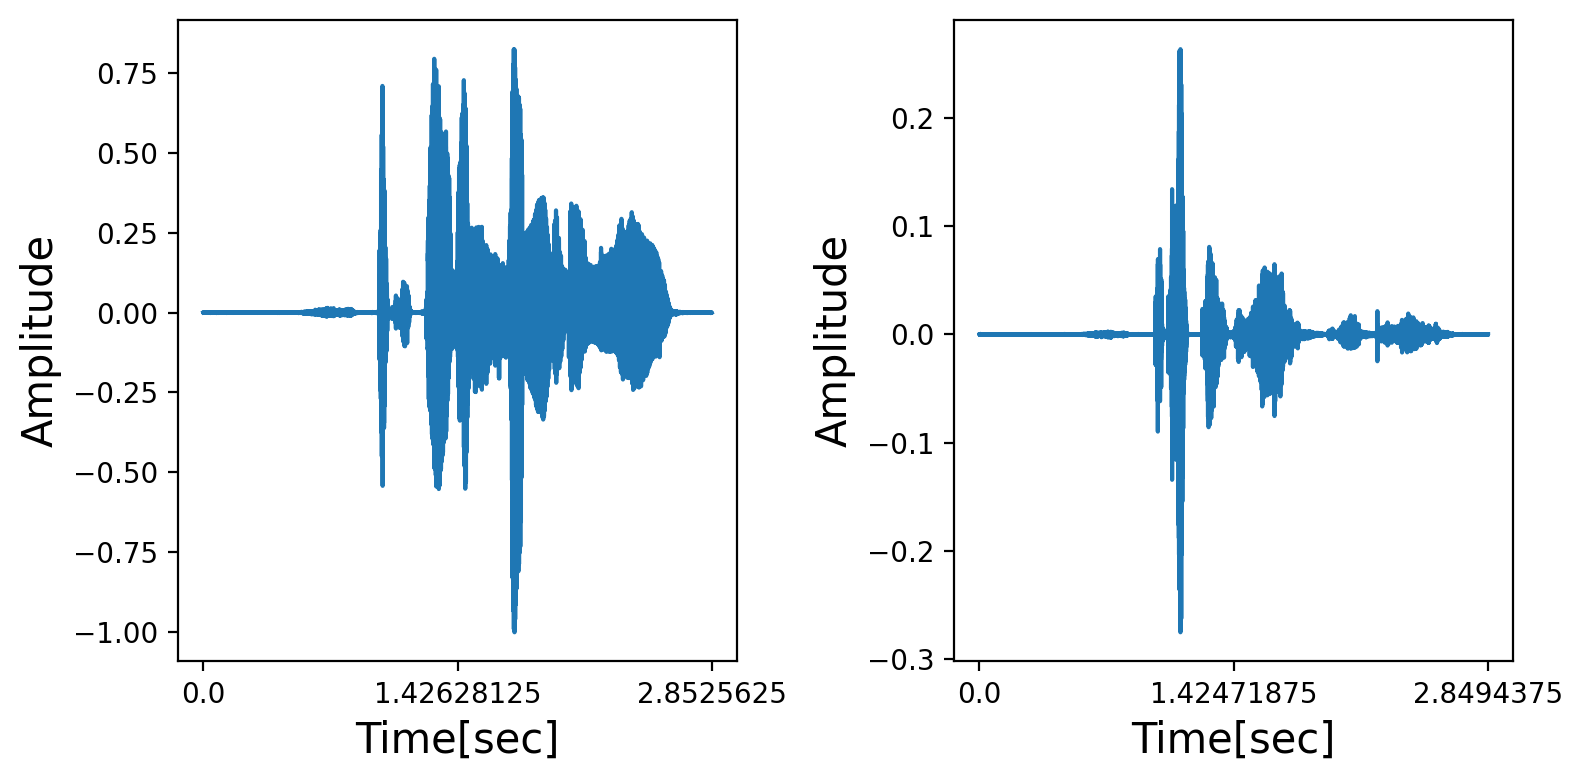

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plot_audio(audio, axes[0], step=2)
plot_audio(sinc_audio, axes[1], step=2)
fig.tight_layout()

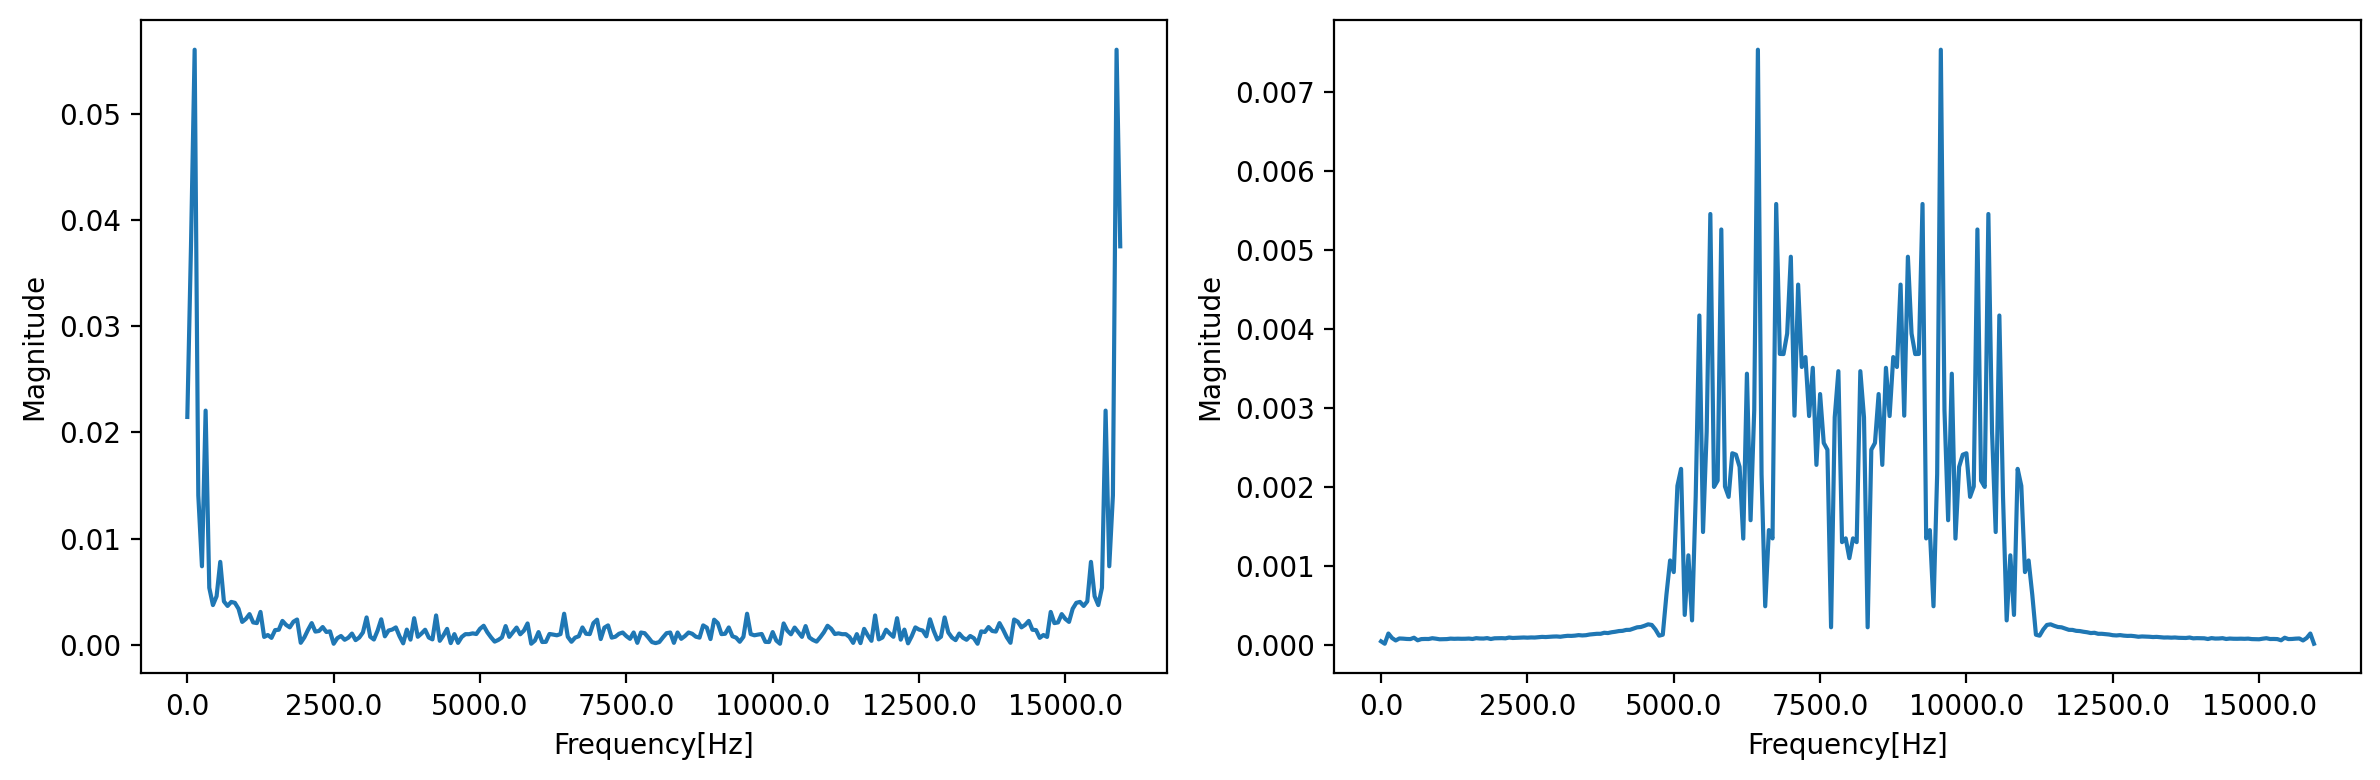

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_freq(audio.numpy(), axes[0], step=40)
plot_freq(sinc_audio.numpy(), axes[1], step=40)
fig.tight_layout()

In [ ]:
Audio(sinc_audio, rate=sr)

### Sinc-layer for the homework (no comments)

In [ ]:
class SincConv_fast(nn.Module):
    """Sinc-based convolution
    Parameters
    ----------
    in_channels : `int`
        Number of input channels. Must be 1.
    out_channels : `int`
        Number of filters.
    kernel_size : `int`
        Filter length.
    sample_rate : `int`, optional
        Sample rate. Defaults to 16000.
    Usage
    -----
    See `torch.nn.Conv1d`
    Reference
    ---------
    Mirco Ravanelli, Yoshua Bengio,
    "Speaker Recognition from raw waveform with SincNet".
    https://arxiv.org/abs/1808.00158
    """

    @staticmethod
    def to_mel(hz):
        return 2595 * np.log10(1 + hz / 700)

    @staticmethod
    def to_hz(mel):
        return 700 * (10 ** (mel / 2595) - 1)

    def __init__(self, out_channels, kernel_size, sample_rate=16000, in_channels=1,
                 stride=1, padding=0, dilation=1, bias=False, groups=1, min_low_hz=50, min_band_hz=50):

        super(SincConv_fast,self).__init__()

        if in_channels != 1:
            #msg = (f'SincConv only support one input channel '
            #       f'(here, in_channels = {in_channels:d}).')
            msg = "SincConv only support one input channel (here, in_channels = {%i})" % (in_channels)
            raise ValueError(msg)

        self.out_channels = out_channels
        self.kernel_size = kernel_size

        # Forcing the filters to be odd (i.e, perfectly symmetrics)
        if kernel_size%2==0:
            self.kernel_size=self.kernel_size+1

        self.stride = stride
        self.padding = padding
        self.dilation = dilation

        if bias:
            raise ValueError('SincConv does not support bias.')
        if groups > 1:
            raise ValueError('SincConv does not support groups.')

        self.sample_rate = sample_rate
        self.min_low_hz = min_low_hz
        self.min_band_hz = min_band_hz

        # initialize filterbanks such that they are equally spaced in Mel scale
        low_hz = 30
        high_hz = self.sample_rate / 2 - (self.min_low_hz + self.min_band_hz)

        mel = np.linspace(self.to_mel(low_hz),
                          self.to_mel(high_hz),
                          self.out_channels + 1)
        hz = self.to_hz(mel)


        # filter lower frequency (out_channels, 1)
        self.low_hz_ = nn.Parameter(torch.Tensor(hz[:-1]).view(-1, 1))

        # filter frequency band (out_channels, 1)
        self.band_hz_ = nn.Parameter(torch.Tensor(np.diff(hz)).view(-1, 1))

        # Hamming window
        #self.window_ = torch.hamming_window(self.kernel_size)
        n_lin=torch.linspace(0, (self.kernel_size/2)-1, steps=int((self.kernel_size/2))) # computing only half of the window
        self.window_=0.54-0.46*torch.cos(2*math.pi*n_lin/self.kernel_size);


        # (1, kernel_size/2)
        n = (self.kernel_size - 1) / 2.0
        self.n_ = 2*math.pi*torch.arange(-n, 0).view(1, -1) / self.sample_rate # Due to symmetry, I only need half of the time axes




    def forward(self, waveforms):
        """
        Parameters
        ----------
        waveforms : `torch.Tensor` (batch_size, 1, n_samples)
            Batch of waveforms.
        Returns
        -------
        features : `torch.Tensor` (batch_size, out_channels, n_samples_out)
            Batch of sinc filters activations.
        """

        self.n_ = self.n_.to(waveforms.device)

        self.window_ = self.window_.to(waveforms.device)

        low = self.min_low_hz  + torch.abs(self.low_hz_)

        high = torch.clamp(low + self.min_band_hz + torch.abs(self.band_hz_),self.min_low_hz,self.sample_rate/2)
        band=(high-low)[:,0]

        f_times_t_low = torch.matmul(low, self.n_)
        f_times_t_high = torch.matmul(high, self.n_)

        band_pass_left=((torch.sin(f_times_t_high)-torch.sin(f_times_t_low))/(self.n_/2))*self.window_ # Equivalent of Eq.4 of the reference paper (SPEAKER RECOGNITION FROM RAW WAVEFORM WITH SINCNET). I just have expanded the sinc and simplified the terms. This way I avoid several useless computations.
        band_pass_center = 2*band.view(-1,1)
        band_pass_right= torch.flip(band_pass_left,dims=[1])


        band_pass=torch.cat([band_pass_left,band_pass_center,band_pass_right],dim=1)


        band_pass = band_pass / (2*band[:,None])


        self.filters = (band_pass).view(
            self.out_channels, 1, self.kernel_size)

        return F.conv1d(waveforms, self.filters, stride=self.stride,
                        padding=self.padding, dilation=self.dilation,
                         bias=None, groups=1)


In [ ]:
model = SincConv_fast(out_channels=1, kernel_size=51, min_band_hz=0, min_low_hz=5000)

In [ ]:
sinc_audio = model(audio).detach()
print('sinc_audio', sinc_audio)
print('shape', sinc_audio.shape)

sinc_audio tensor([[ 1.0872e-04, -8.6016e-05,  2.1207e-05,  ...,  5.3981e-05,
         -9.7551e-05,  1.4896e-04]])
shape torch.Size([1, 45591])


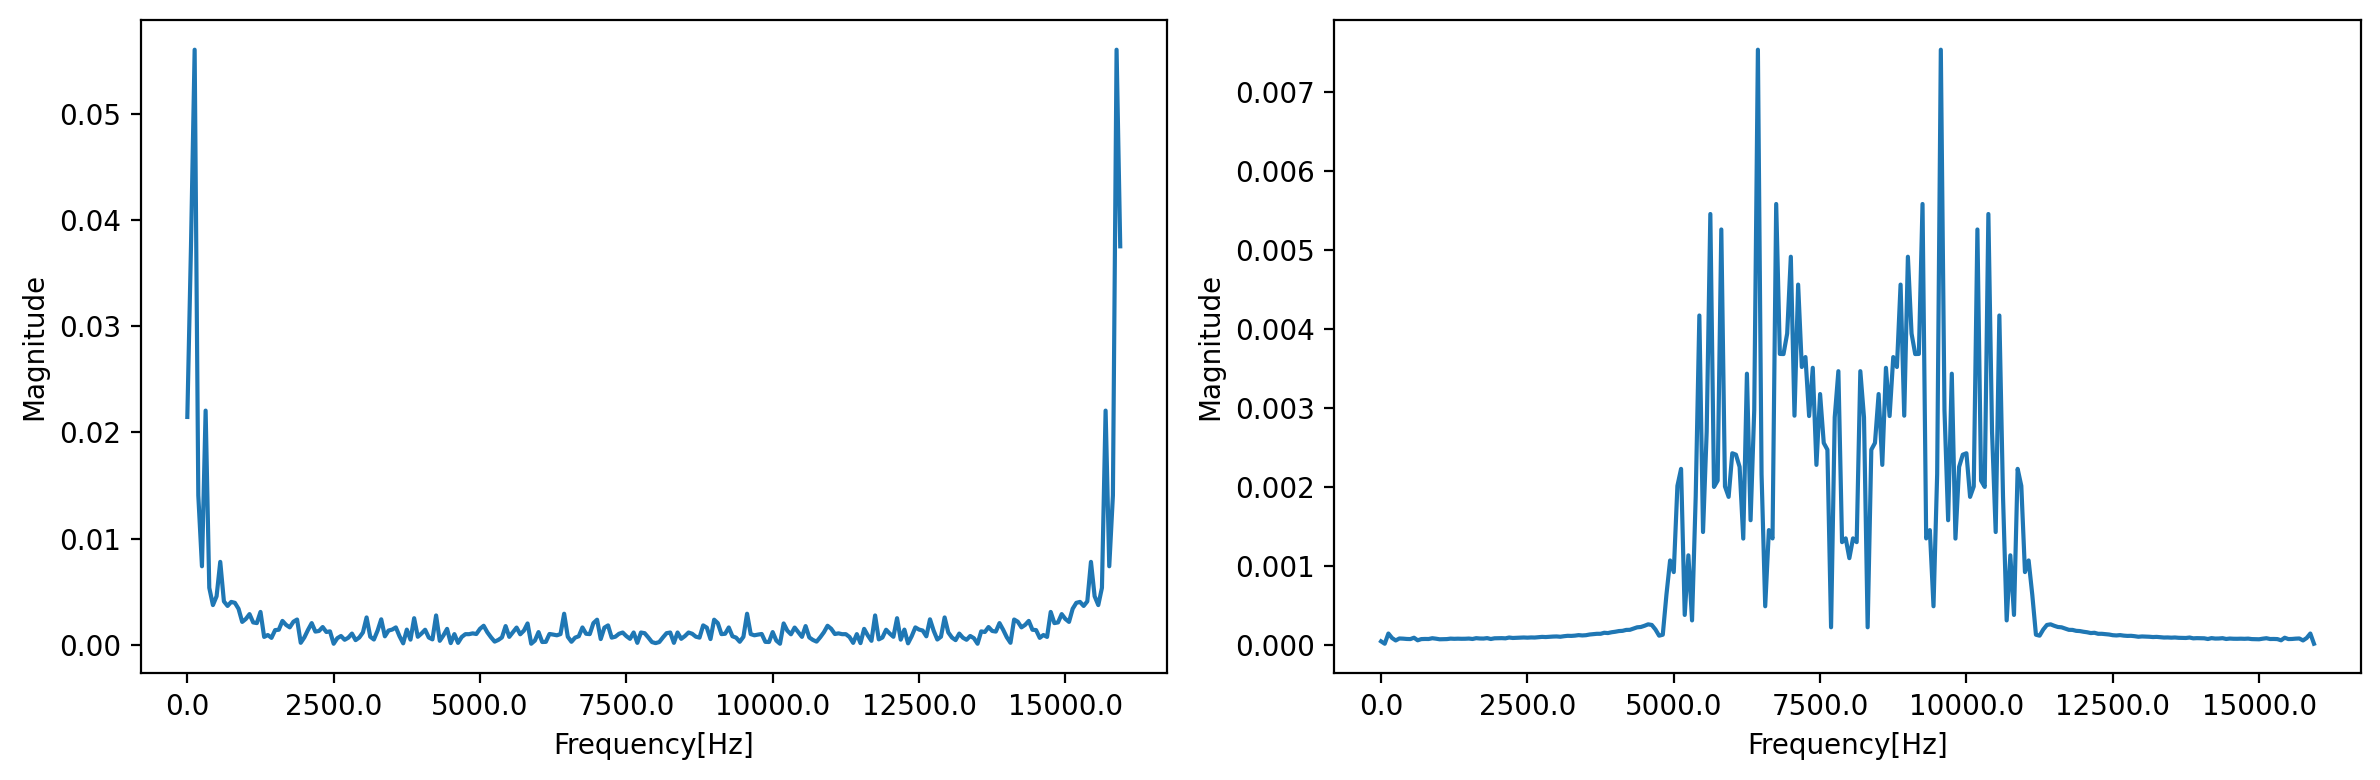

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_freq(audio.numpy(), axes[0], step=40)
plot_freq(sinc_audio.numpy(), axes[1], step=40)
fig.tight_layout()

# GNN

The following materials are based on [HSE GNN Course](https://github.com/elvarid/gnn_course_hse) (in Russian).

Check these seminars:

1. [Message Passing](https://github.com/elvarid/gnn_course_hse/blob/main/seminars/sem05-message-passing.ipynb)
2. [Heterogeneous graphs](https://github.com/elvarid/gnn_course_hse/blob/main/seminars/sem06-hetero-graphs.ipynb)


## PyTorch Geometric

The first library we will look at is [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

In [ ]:
# To avoid infinite installation of PyTorch Geometric do the following:

import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Each graph is presented by the embeddings of its vertices and pairs of indices for each edge:

In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

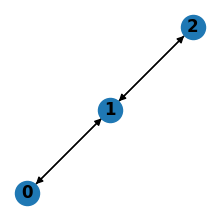

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

from torch_geometric.utils import to_networkx

import warnings
warnings.filterwarnings('ignore')


fig = plt.figure(figsize=(2, 2))
G = to_networkx(data)
nx.draw(G, with_labels=True, font_weight='bold', )

Below is an example of a classic GCN network with different variations of inner convolution layer.

In [ ]:
import torch
import torch_scatter
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

from torch import Tensor
from typing import Union, Tuple, Optional
from torch_geometric.typing import (OptPairTensor, Adj, Size, NoneType,
                                    OptTensor)

from torch.nn import Parameter, Linear
from torch_sparse import SparseTensor, set_diag
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import remove_self_loops, add_self_loops, softmax


class GNNStack(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, args, emb=False):
        super(GNNStack, self).__init__()
        conv_model = self.build_conv_model(args.model_type)
        self.convs = nn.ModuleList()
        self.convs.append(conv_model(input_dim, hidden_dim))
        assert (args.num_layers >= 1), 'Number of layers is not >=1'
        for l in range(args.num_layers-1):
            self.convs.append(conv_model(args.heads * hidden_dim, hidden_dim))

        # post-message-passing
        self.post_mp = nn.Sequential(
            nn.Linear(args.heads * hidden_dim, hidden_dim), nn.Dropout(args.dropout),
            nn.Linear(hidden_dim, output_dim))

        self.dropout = args.dropout
        self.num_layers = args.num_layers

        self.emb = emb

    def build_conv_model(self, model_type):
        if model_type == 'GraphSage':
            return GraphSage
        elif model_type == 'Conv':
            return  torch_geometric.nn.GCNConv
        else:
            raise Exception('Not implemented!')

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for i in range(self.num_layers):
            # Each PyTorch Geometric layer requires to pass data in Graph format (or pass embeddings + edge index)
            x = self.convs[i](x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout,training=self.training)

        x = self.post_mp(x)

        if self.emb == True:
            return x

        return F.log_softmax(x, dim=1)

    def loss(self, pred, label):
        return F.nll_loss(pred, label)

### Message Passing

The process of passing graph through GNN-layer is called **Message Passing**.

We want to create a new GNN layer $l$. Let's imagine we have embeddings for each vertex from the previous layer: $h_u^{l-1}$, where $u$ is the vertex id. Each GNN layer can be divided into three main parts:

1. **Message**. Here we apply function to $h_u^{l-1}$ and get an intermidiate embedding $m_u^{l-1}$ (message).

2. **Aggregation**. Here we aggregate messages from each neighbour of the current vertex $u$:
  $$
  AGG(u, l) = \text{agg_function}(m_v^{l-1} \, | \, v \in  \text{neighbour}(u))
  $$
  Aggregation function can be any order-independent function: sum, mean, random element, etc.

3. **Update**. Here we create an embedding for a new layer by applying function to the aggregation result and (optionally) to the previous embedding (residual connection).
  $$
  h_u^{l} = \text{update_function}(\text{residual_function}(h_u^{l-1}), AGG(u, l))
  $$

---

Let's discuss how to implement PyTorch Geometric layer by creating [GraphSage](https://arxiv.org/abs/1706.02216) version of convolution.

For GraphSage, 3 steps above combine into the following formula:

$$
h_u^{l} = W_1 h_u^{l-1} + W_2 \cdot \left(\frac{1}{|\text{neighbour}(u)|} \sum_{v \in \text{neighbour}(u)} h_v^{l-1} \right)
$$

*(Message is just an identity function, Aggregation is a mean function and Update is a linear transform.)*

In PytorchGeomteric method **Propogate** combines **Message** and **Aggregation** step into single step.

In [ ]:
class GraphSage(MessagePassing):
    def __init__(self, in_channels, out_channels, normalize=True,
                 bias=False, **kwargs):
        super(GraphSage, self).__init__(**kwargs)

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.normalize = normalize

        self.lin_l = torch.nn.Linear(in_channels, out_channels, bias=bias)
        self.lin_r = torch.nn.Linear(in_channels, out_channels, bias=bias)

        self.reset_parameters()

    def reset_parameters(self):
        self.lin_l.reset_parameters()
        self.lin_r.reset_parameters()

    def forward(self, x, edge_index):
        # x is shape (N, in_c)
        neighbor_out = self.propagate(edge_index, x=(x, x))
        out = self.lin_l(x) + self.lin_r(neighbor_out)
        if self.normalize:
            out = torch.nn.functional.normalize(out, p=2)

        return out

    def message(self, x_j, x_i):
        # x_j has shape (E, d)
        out = x_j
        return out

    def aggregate(self, inputs, index, dim_size=None):
        node_dim = self.node_dim

        out = torch_scatter.scatter(inputs, index, dim=node_dim, reduce='mean')

        return out

### Training Example

Training example on [Cora Graph Dataset](https://arxiv.org/pdf/1603.08861.pdf)

In [ ]:
import torch.optim as optim


def build_optimizer(args, params):
    weight_decay = args.weight_decay
    filter_fn = filter(lambda p : p.requires_grad, params)
    if args.opt == 'adam':
        optimizer = optim.Adam(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'sgd':
        optimizer = optim.SGD(filter_fn, lr=args.lr, momentum=0.95, weight_decay=weight_decay)
    elif args.opt == 'rmsprop':
        optimizer = optim.RMSprop(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'adagrad':
        optimizer = optim.Adagrad(filter_fn, lr=args.lr, weight_decay=weight_decay)
    if args.opt_scheduler is None:
        return None, optimizer
    elif args.opt_scheduler == 'step':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=args.opt_decay_step, gamma=args.opt_decay_rate)
    elif args.opt_scheduler == 'cos':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=args.opt_restart)
    return scheduler, optimizer

In [ ]:
import time

import networkx as nx
import numpy as np
import torch
import torch.optim as optim
from tqdm import trange
import pandas as pd
import copy

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader

import torch_geometric.nn as pyg_nn

import matplotlib.pyplot as plt


def train(dataset, args):

    print("Node task. test set size:", np.sum(dataset[0]['test_mask'].numpy()))
    print()
    test_loader = loader = DataLoader(dataset, batch_size=args.batch_size, shuffle=False)

    # build model
    model = GNNStack(dataset.num_node_features, args.hidden_dim, dataset.num_classes,
                            args)
    scheduler, opt = build_optimizer(args, model.parameters())

    # train
    losses = []
    test_accs = []
    best_acc = 0
    best_model = None
    for epoch in trange(args.epochs, desc="Training", unit="Epochs"):
        total_loss = 0
        model.train()
        for batch in loader:
            opt.zero_grad()
            pred = model(batch)
            label = batch.y
            pred = pred[batch.train_mask]
            label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)
        losses.append(total_loss)

        if epoch % 10 == 0:
            test_acc = test(test_loader, model)
            test_accs.append(test_acc)
            if test_acc > best_acc:
                best_acc = test_acc
                best_model = copy.deepcopy(model)
        else:
            test_accs.append(test_accs[-1])

    return test_accs, losses, best_model, best_acc, test_loader

def test(loader, test_model, is_validation=False, save_model_preds=False, model_type=None):
    test_model.eval()

    correct = 0
    # Note that Cora is only one graph!
    for data in loader:
        with torch.no_grad():
            # max(dim=1) returns values, indices tuple; only need indices
            pred = test_model(data).max(dim=1)[1]
            label = data.y

        mask = data.val_mask if is_validation else data.test_mask
        # node classification: only evaluate on nodes in test set
        pred = pred[mask]
        label = label[mask]

        if save_model_preds:
            print ("Saving Model Predictions for Model Type", model_type)

            data = {}
            data['pred'] = pred.view(-1).cpu().detach().numpy()
            data['label'] = label.view(-1).cpu().detach().numpy()

            df = pd.DataFrame(data=data)
            # Save locally as csv
            df.to_csv('CORA-Node-' + model_type + '.csv', sep=',', index=False)

        correct += pred.eq(label).sum().item()

    total = 0
    for data in loader.dataset:
        total += torch.sum(data.val_mask if is_validation else data.test_mask).item()

    return correct / total

class ObjectView(object):
    def __init__(self, d):
        self.__dict__ = d

In [ ]:
args = {
    'model_type': 'GraphSage',
    'dataset': 'cora',
    'num_layers': 2,
    'heads': 1,
    'batch_size': 32,
    'hidden_dim': 32,
    'dropout': 0.5,
    'epochs': 500,
    'opt': 'adam',
    'opt_scheduler': None,
    'opt_restart': 0,
    'weight_decay': 5e-3,
    'lr': 0.01
}

Node task. test set size: 1000



Training: 100%|██████████| 500/500 [01:52<00:00,  4.45Epochs/s]


Maximum test set accuracy: 0.797
Minimum loss: 0.11542930454015732
Saving Model Predictions for Model Type GraphSage



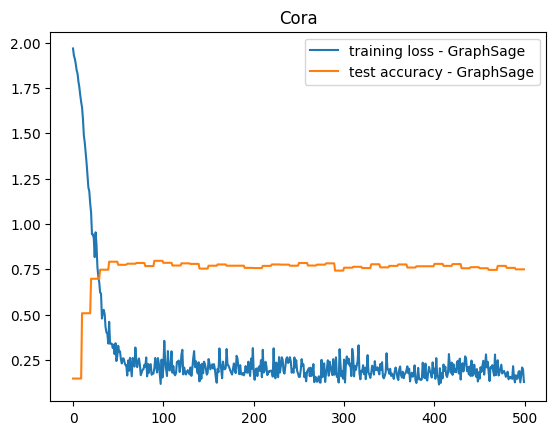

In [ ]:
args = ObjectView(args)
model = 'GraphSage'
if args.dataset == 'cora':
    dataset = Planetoid(root='/tmp/cora', name='Cora')
else:
    raise NotImplementedError("Unknown dataset")
test_accs, losses, best_model, best_acc, test_loader = train(dataset, args)

print("Maximum test set accuracy: {0}".format(max(test_accs)))
print("Minimum loss: {0}".format(min(losses)))

# Run test for our best model to save the predictions!
test(test_loader, best_model, is_validation=False, save_model_preds=True, model_type=model)
print()

plt.title(dataset.name)
plt.plot(losses, label="training loss" + " - " + args.model_type)
plt.plot(test_accs, label="test accuracy" + " - " + args.model_type)
plt.legend()
plt.show()

### Important Notes

#### Note 1

Let's look at `propagate` function:
```
self.propagate(edge_index, x=(x, x), size=size)
```

**Note:** `x=(x,x)` is equivalent to `x=x`.

First argument defines the edges. The second one has a non-obvious format:

```
VariableName = (Embeddigns for the left parts of edge, Embeddgins for the right parts of edge)
```

Thus, in the example above. Both left and right vertecies have embeddigns $x$.

When `propogate` function calls `message` function, we get extra variables for corresponding left and right parts. Left part is defined with index $i$ and right part with index $j$: `VariableName_i, VariableName_j`. You can use any in `message` method and even both.


Shape of `VariableName_i` is equal to $|E| \times d$, where E is the set of edges and $d$ is vertex embedding size.

#### Note 2

`index` argument in Aggregation method can also be used in Message method. This argument defines to which vertex $i$ each element from $j$ is connected.

<div>
<img src="https://raw.githubusercontent.com/rusty1s/pytorch_scatter/master/docs/source/_figures/add.svg?sanitize=true" width="400"/>
</div>

Basically, `index` saves the second row from `edge_index` (about `j`).

The picture above illustrates how `torch_scatter.scatter(inputs, index, dim=node_dim, reduce='sum')` works.

#### Note 3

If `aggregation` is a standard function like sum or mean, you can skip writing method by yourself and use special key-argument, when calling `super`, instead:

```
super(GraphSage, self).__init__(aggr='mean', **kwargs)
```


## Deep Graph Library (DGL)

Another library called [Deep Graph Library](https://docs.dgl.ai/index.html) is more simple when you want to work with heterogeneous graphs.

**Note**: another popular option is called [DeepSnap](https://snap.stanford.edu/deepsnap/), or you can use PyTorch Geometric as well.

In [ ]:
# check your cuda version and do proper download (if your cuda version is greater than the supported one -- try the latest)
# see https://www.dgl.ai/pages/start.html

!nvidia-smi

Tue Sep 19 08:56:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# If you have installed dgl-cuXX package, please uninstall it first.
!pip uninstall -y dgl
!pip uninstall -y dglgo

!pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

### Heterogeneous graphs

Heterogeneous graph is a classic graph but with different types of edges (a.k.a. relations), meaning that now $G = (V, E, R)$ where $R$ is a set of relations and each edge is a triple: $(u, r, v)$. Note that $(u, r_1, v)$ and $(u, r_2, v)$ are different edges.

How does this change GNN? It is simple! We just do regular GNN-layer for each type of relation and then apply **relation-wise** aggregation + update function. See the picture below for $G = \{(a, r_1, a), (a, r_2, b), (a, r_3, b)\}$:


<div>
<img src="https://camo.githubusercontent.com/061e35fc43a3629e0e3c469b16b65b4cf670b5d46184360c1e74e12eae7b788f/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d316d6b70344f655272764334694e465458537977726d493650666c354a5f5f6741" width="700"/>
</div>

Mathematically, it can be written the following way:

1. Do update for each relation:
  $$
    h_u^{l}[r] = \text{update_function}(\text{residual_function}(h_u^{l-1}), AGG(u, l, r))
  $$

2. Aggregate relations and update:

  $$
  h_u^{l} = \text{final_update_function}(\text{final_residual_function}(h_u^{l-1}), \text{relation_}AGG(u, l))
  $$

  Where $\text{relation_}AGG(u, l)$, for example, can be just a sum:
  $$
  \text{relation_}AGG(u, l) = \sum_{r\in R} h_u^{l}[r]
  $$


### DGL Graph and Simple Network

Let's see how graphs are represented in DGL.

In [ ]:
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import dgl.function as fn
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


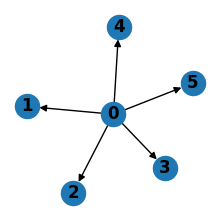

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

import warnings
warnings.filterwarnings('ignore')

# to create a graph, you only need information about edges
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]), num_nodes=6)


fig = plt.figure(figsize=(2, 2))
G = dgl.to_networkx(g)
nx.draw(G, with_labels=True, font_weight='bold', )

In [ ]:
# node embeddings are created via a special argument ndata
# you can create several embeddings for each node by changing name in ndata

# Assign a 3-dimensional node feature vector for each node.
g.ndata["x"] = torch.randn(6, 3)

# Assign a 5x4 node feature matrix for each node.  Node and edge features in DGL can be multi-dimensional.
g.ndata["y"] = torch.randn(6, 5, 4)

g

Graph(num_nodes=6, num_edges=5,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5, 4), dtype=torch.float32)}
      edata_schemes={})

In [ ]:
# check that cuda is working
g.to('cuda')

Graph(num_nodes=6, num_edges=5,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5, 4), dtype=torch.float32)}
      edata_schemes={})

Now, let's create simple GNN via dgl. We will take the same GraphSage architecture.

While PyTorch Geometric forces us to write and apply functions by ourselves, DGL has a *function* pipeline that operates over feature names and simplifies the code. There are many built-in [classic functions](https://docs.dgl.ai/api/python/dgl.function.html#api-built-in), and you are also allowed to create [user-defined functions](https://docs.dgl.ai/api/python/udf.html#apiudf).

Generally, each function takes input feature names and output feature name as arguments and stores the result in a new feature inside `ndata` or `edata` dictionary with this output feature name.

In [ ]:
class SAGEConv(nn.Module):
    """Graph convolution module used by the GraphSAGE model.

    Parameters
    ----------
    in_feat : int
        Input feature size.
    out_feat : int
        Output feature size.
    """

    def __init__(self, in_feat, out_feat):
        super(SAGEConv, self).__init__()
        # A linear submodule for projecting the input and neighbor feature to the output.
        self.linear_1 = nn.Linear(in_feat, out_feat)
        self.linear_2 = nn.Linear(in_feat, out_feat)

    def forward(self, g, h):
        """Forward computation

        Parameters
        ----------
        g : Graph
            The input graph.
        h : Tensor
            The input node feature.
        """
        with g.local_scope():
            g.ndata["h"] = h
            # update_all is a message passing API.
            g.update_all(
                message_func=fn.copy_u("h", "m"),
                reduce_func=fn.mean("m", "h_N"),
            )
            h_N = g.ndata["h_N"]
            h_total = self.linear_1(h) + self.linear_2(h_N)
            return h_total

In [ ]:
class Model(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(Model, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats)
        self.conv2 = SAGEConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

### Training example

In [ ]:
import dgl.data

dataset = dgl.data.CoraGraphDataset()
g = dataset[0]


def train(g, model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    all_logits = []
    best_val_acc = 0
    best_test_acc = 0

    features = g.ndata["feat"]
    labels = g.ndata["label"]
    train_mask = g.ndata["train_mask"]
    val_mask = g.ndata["val_mask"]
    test_mask = g.ndata["test_mask"]
    for e in range(200):
        # Forward
        logits = model(g, features)

        # Compute prediction
        pred = logits.argmax(1)

        # Compute loss
        # Note that we should only compute the losses of the nodes in the training set,
        # i.e. with train_mask 1.
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        # Compute accuracy on training/validation/test
        train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
        val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
        test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

        # Save the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        all_logits.append(logits.detach())

        if e % 5 == 0:
            print(
                "In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})".format(
                    e, loss, val_acc, best_val_acc, test_acc, best_test_acc
                )
            )


model = Model(g.ndata["feat"].shape[1], 16, dataset.num_classes)
train(g, model)

Extracting file to /root/.dgl/cora_v2_d697a464
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.
In epoch 0, loss: 1.976, val acc: 0.156 (best 0.156), test acc: 0.144 (best 0.144)
In epoch 5, loss: 1.887, val acc: 0.260 (best 0.316), test acc: 0.240 (best 0.286)
In epoch 10, loss: 1.776, val acc: 0.414 (best 0.414), test acc: 0.415 (best 0.415)
In epoch 15, loss: 1.615, val acc: 0.544 (best 0.574), test acc: 0.571 (best 0.589)
In epoch 20, loss: 1.410, val acc: 0.596 (best 0.596), test acc: 0.628 (best 0.628)
In epoch 25, loss: 1.161, val acc: 0.672 (best 0.672), test acc: 0.693 (best 0.693)
In epoch 30, loss: 0.895, val acc: 0.734 (best 0.734), test acc: 0.736 (best 0.736)
In epoch 35, loss: 0.646, val acc: 0.756 (best 0.760), test acc: 0.742 (best 0.747)
In epoch 40, loss: 0.442, val acc: 0.758 (best 0.760), test a

### Heterogeneous GNN in DGL

**Note**: do not be afraid of creating Heterogeneous GNNs via hand-crafted combination of classic GNNs, if it is simpler for you.

Let's look at a simple example of a heterogeneous graph:

In [ ]:
graph_data = {
   ('dog', 'friend', 'dog'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('dog', 'friend', 'human'): (torch.tensor([0, 1]), torch.tensor([2, 3])),
   ('cat', 'scared_of', 'dog'): (torch.tensor([1]), torch.tensor([2]))
}
g = dgl.heterograph(graph_data)
g

Graph(num_nodes={'cat': 2, 'dog': 3, 'human': 4},
      num_edges={('cat', 'scared_of', 'dog'): 1, ('dog', 'friend', 'dog'): 2, ('dog', 'friend', 'human'): 2},
      metagraph=[('cat', 'dog', 'scared_of'), ('dog', 'dog', 'friend'), ('dog', 'human', 'friend')])

Below is an example of Relational-GraphSage network.

In [ ]:
import dgl.function as fn

class RelationalSAGEConv(nn.Module):
    """Graph convolution module used by the GraphSAGE model.

    Parameters
    ----------
    in_feat : int
        Input feature size.
    out_feat : int
        Output feature size.
    """

    def __init__(self, out_feat, relations_info):
        '''
        Parameters
        ----------
        out_feat : Int
                   Number of output features (the same for each relation)

        relations_info : list
                         List of dicts, containing information about relations
        '''
        super().__init__()
        # A linear submodule for projecting the input and neighbor feature to the output.
        self.linear = nn.ModuleDict({
            relations_info[i]['relation_name']: nn.Linear(relations_info[i]['in_feat'], out_feat) for i in len(relations_info)
        })

    def forward(self, g, feat_dict):
        """Forward computation

        Parameters
        ----------
        g : Graph
            The input graph.

        feat_dict : dict
                    dict of features for each srctype
        """

        funcs = {} # here we save the information about MassagePassing for each relation

        for c_etype in g.canonical_etypes:
            srctype, etype, dsttype = c_etype
            Wh = self.linear[etype](feat_dict[srctype])
            # Save it in graph for message passing
            g.nodes[srctype].data['Wh_%s' % etype] = Wh
            # Specify per-relation message passing functions: (message_func, reduce_func).
            # Note that the results are saved to the same destination feature 'h', which
            # hints the type wise reducer for aggregation.
            funcs[etype] = (fn.copy_u('Wh_%s' % etype, 'm'), fn.mean('m', 'h'))
        # Trigger message passing of multiple types.
        g.multi_update_all(funcs, 'sum')
        # return the updated node feature dictionary
        return {ntype : g.nodes[ntype].data['h'] for ntype in g.ntypes}